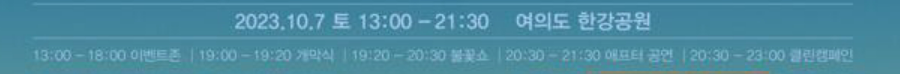

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import StandardScaler

## 기본 자료

In [955]:
k = pd.read_csv("KIKmix_20230701.csv")
k.head()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN


In [61]:
여의동_cd = k[k['읍면동명'] == '여의동']
여의동_cd

#1156054000

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
587,1156054000,서울특별시,영등포구,여의동,1156011000,여의도동,19880423,NaN
9404,4511366500,전라북도,전주시 덕진구,여의동,4511312900,고랑동,20191001,NaN
9405,4511366500,전라북도,전주시 덕진구,여의동,4511313000,여의동,20191001,NaN
9406,4511366500,전라북도,전주시 덕진구,여의동,4511313100,만성동,20191001,NaN
9407,4511366500,전라북도,전주시 덕진구,여의동,4511313200,장동,20191001,NaN
9408,4511366500,전라북도,전주시 덕진구,여의동,4511313900,여의동2가,20200515,NaN


In [551]:
반포동_cd = k[k['동리명'] == '반포동']
반포동_cd

#1165055000
#1165056000
#1165057000
#1165058100

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
669,1165055000,서울특별시,서초구,반포본동,1165010700,반포동,19880423,NaN
670,1165056000,서울특별시,서초구,반포1동,1165010700,반포동,19880423,NaN
671,1165057000,서울특별시,서초구,반포2동,1165010700,반포동,19880423,NaN
673,1165058100,서울특별시,서초구,반포4동,1165010700,반포동,19890901,NaN


In [565]:
이촌동_cd = k[k['동리명'] == '이촌동']
이촌동_cd

#1117063000
#1117064000

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
217,1117063000,서울특별시,용산구,이촌제1동,1117012900,이촌동,19880423,NaN
218,1117064000,서울특별시,용산구,이촌제2동,1117012900,이촌동,19880423,NaN


In [10]:
od_oct_7 = pd.read_csv("od_20231001_15/od_20231007_1.csv")
stay_oct_7 = pd.read_csv("stay_20231001_15/stay_20231007_1.csv")

In [535]:
od_oct_7.head()
# 출발행정동
# 도착행정동
# modal 주이동수단
# origin_purpose 출발지 체류 목적
# dest_purpose 도착지 체류 목적
# od_dist_avg 평균 이동거리
# od_duration_avg 평균 이동시간
# od_cnts 이동인원

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,1135064000,1135069500,20231007,19:00,19:00,1,2,0.0,4.0,4,11015,16,17
1,5013061000,5013031000,20231007,15:00,16:00,0,4,0.0,5.0,5,43766,38,7
2,3611052000,3611038000,20231007,10:00,13:00,0,1,0.0,0.0,4,42424,194,7
3,4111158000,4111568000,20231007,16:00,16:00,0,4,0.0,0.0,0,2999,3,6
4,4315025000,4315056000,20231007,14:00,14:00,1,0,1.0,4.0,0,13222,10,11


In [728]:
stay_oct_7.head()
# hdong_cd 체류지 행정동코드
# stay_cnts 체류 인원

,hdong_cd,date,time,gender,age,purpose,stay_cnts
0,4115056800,20231007,15:00,1,7,0,832
1,4611074500,20231007,22:00,1,5,0,1351
2,4711158000,20231007,21:00,1,2,0,981
3,2729053500,20231007,19:00,0,3,0,939
4,4113353000,20231007,22:00,1,2,0,1248


## 여의동 당일 데이터

### OD데이터

In [86]:
### 행정동 도착 + 이떄 목적이 여행, 기타
a = od_oct_7[od_oct_7["dest_hdong_cd"].astype(str) == "1156054000"]
a = a[a['dest_purpose'].astype(str).isin(["4", "5"])]

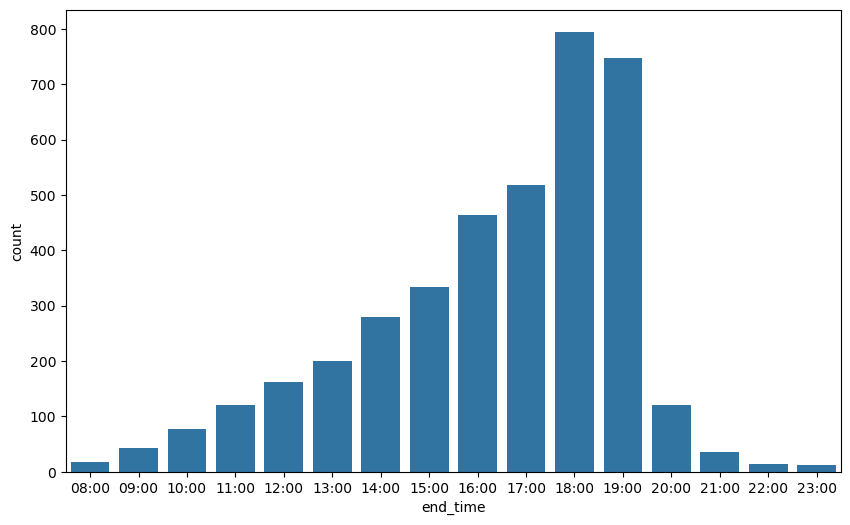

In [87]:
#시간대별 분포
a_time = sorted(a['end_time'].unique())


plt.figure(figsize=(10, 6))
sns.countplot(x='end_time', data=a, order=a_time)
plt.show()
    #불꽃놀이 시작 전/직전에 도착인구가 많음

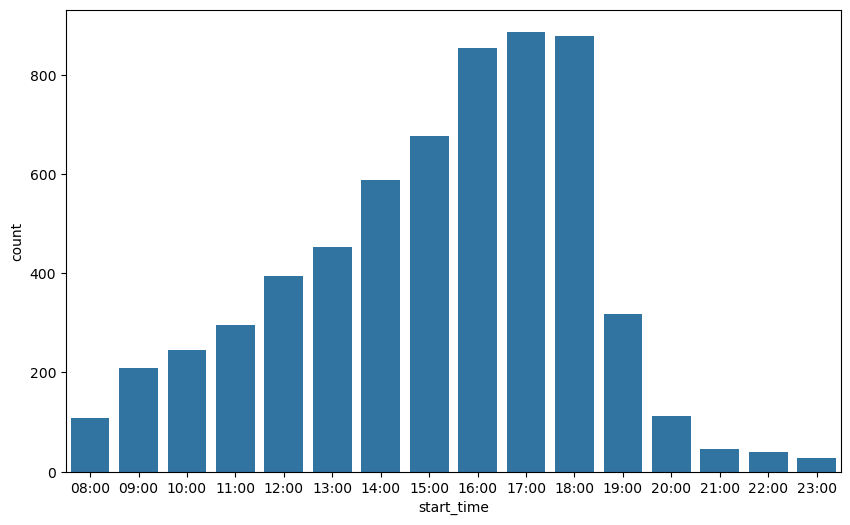

In [82]:
### 불꽃놀이가 끝난 후(20:30) 축제를 떠나는 사람의 증가량 파악 및 혼잡도 측정
plt.figure(figsize=(10, 6))
sns.countplot(x='start_time', data=a, order=a_time)
plt.show()

    #엥 잘 모르겠음.. 뭐지
    #동 범위가 너무 넓어서 그런가
    #떠나는 사람도 꽤 많은데

In [221]:
### 하이라이트 전후시간대 주요 교통수단
aa = od_oct_7[od_oct_7["dest_hdong_cd"].astype(str) == "1156054000"]
move = pd.concat([aa[aa['end_time'].isin(["17:00", "18:00", "19:00","20:00"])],
                  aa[aa['start_time'].isin(["21:00", "22:00"])]])

aa.groupby('modal')['modal'].sum()

modal
0.0       0.0
1.0     396.0
2.0    2882.0
3.0      57.0
4.0     528.0
5.0     290.0
7.0       7.0
Name: modal, dtype: float64

In [223]:
move.groupby('modal')['modal'].sum()

modal
0.0       0.0
1.0     257.0
2.0    1430.0
3.0      21.0
4.0     256.0
5.0     135.0
Name: modal, dtype: float64

In [225]:
move['time'] = move.apply(lambda row: row['end_time'] if pd.notna(row['end_time']) else row['start_time'], axis=1)
move['modal'].unique()

array([0., 2., 1., 4., 5., 3.])

In [227]:
move_g = move.groupby(['time', 'modal'])['od_cnts'].sum().reset_index()
move_g['modal'].unique()

array([0., 1., 2., 4., 5., 3.])

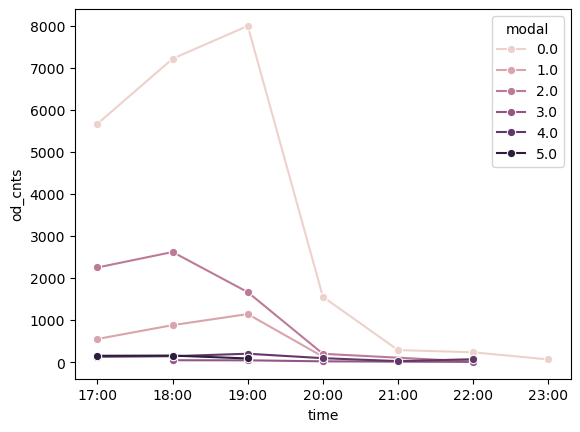

In [229]:
sns.lineplot(x='time', y='od_cnts', hue='modal', data=move_g, marker='o')
plt.show()

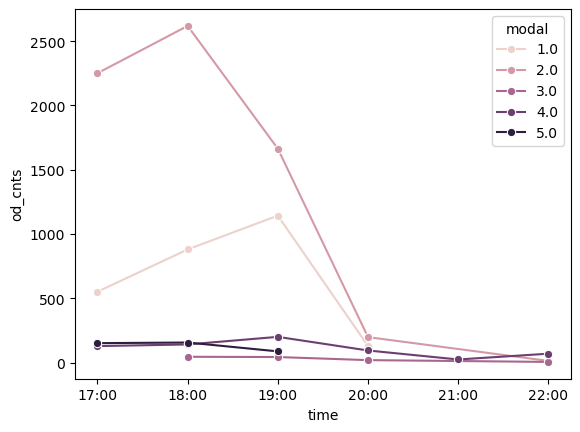

In [237]:
new = move_g[move_g['modal'] != 0.]

sns.lineplot(x='time', y='od_cnts', hue='modal', data=new, marker='o')
plt.show()

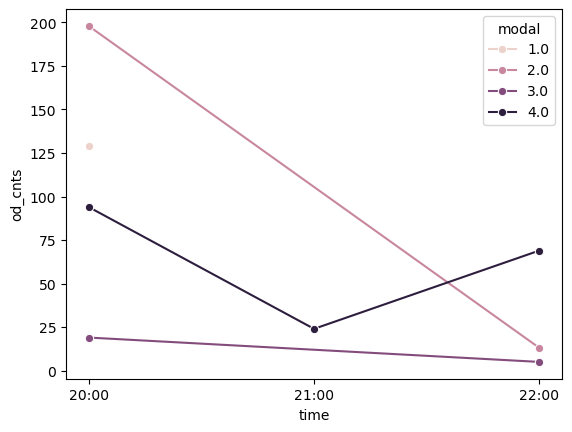

In [241]:
new2 = new[new['time']>= "20:00"]

sns.lineplot(x='time', y='od_cnts', hue='modal', data=new2, marker='o')
plt.show()

### 체류지 데이터

In [151]:
# 여의동 체류 + 목저 여행, 기타
b = stay_oct_7[stay_oct_7["hdong_cd"].astype(str) == "1156054000"]
b = b[b['purpose'].astype(str).isin(["4", "5"])]

In [122]:
#나이대별, 성별별, 목적별로 구분해서 출력
#즉 9*2*2 = 36.... 시간마다 36개씩 출력
# 시간은 총 16개
b_시간 = b['time'].value_counts()
b_시간

time
19:00    36
13:00    36
21:00    36
20:00    36
18:00    36
15:00    36
11:00    36
16:00    36
12:00    36
14:00    36
10:00    36
17:00    36
22:00    36
08:00    36
23:00    36
09:00    36
Name: count, dtype: int64

In [136]:
b_group = b.groupby('time')['stay_cnts'].sum().reset_index()
b_group

,time,stay_cnts
0,08:00,13343
1,09:00,17050
2,10:00,20913
3,11:00,27377
4,12:00,35708
5,13:00,46719
6,14:00,58883
7,15:00,74272
8,16:00,95495
9,17:00,118801


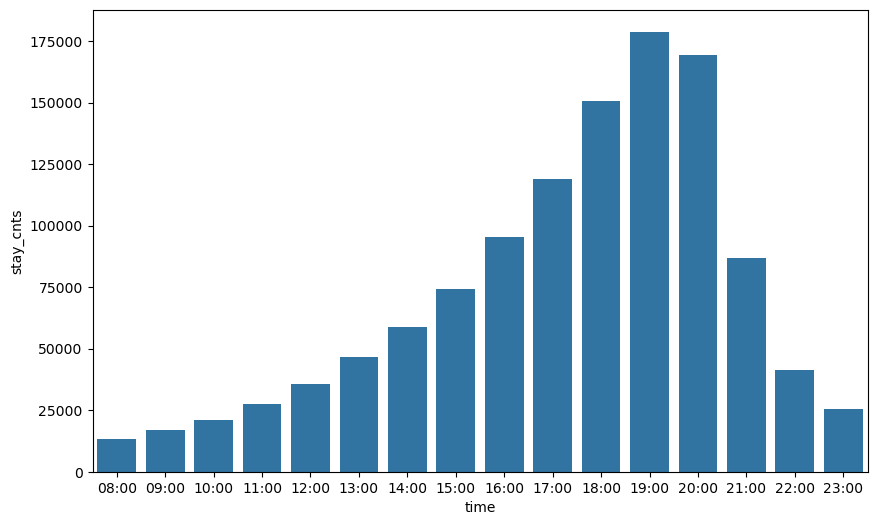

In [142]:
b_time = sorted(b['time'].unique())

plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='stay_cnts', data=b_group, order=b_time)
plt.show()

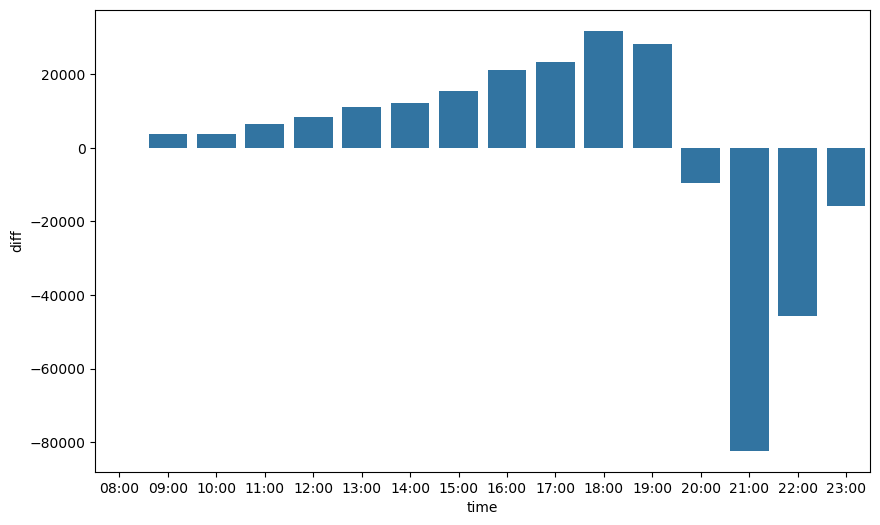

In [146]:
b_group = b_group.sort_values(by='time')

b_group['diff'] = b_group['stay_cnts'] - b_group['stay_cnts'].shift(1)

plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='diff', data=b_group, order=b_time)
plt.show()
    #불꽃놀이 시작하고나서는 사람이 추가되지않음
    #불꽃놀이 끝나면 체류인원이 확 줄어듬 : 21시

## 반포동, 이촌동 데이터

### 반포동

In [559]:
banpo = od_oct_7[od_oct_7["dest_hdong_cd"].astype(str).isin(["1165055000",'1165056000',
                                                           '1165057000','1165058100'])]

banpo = banpo[banpo['dest_purpose'].astype(str).isin(["4", "5"])]

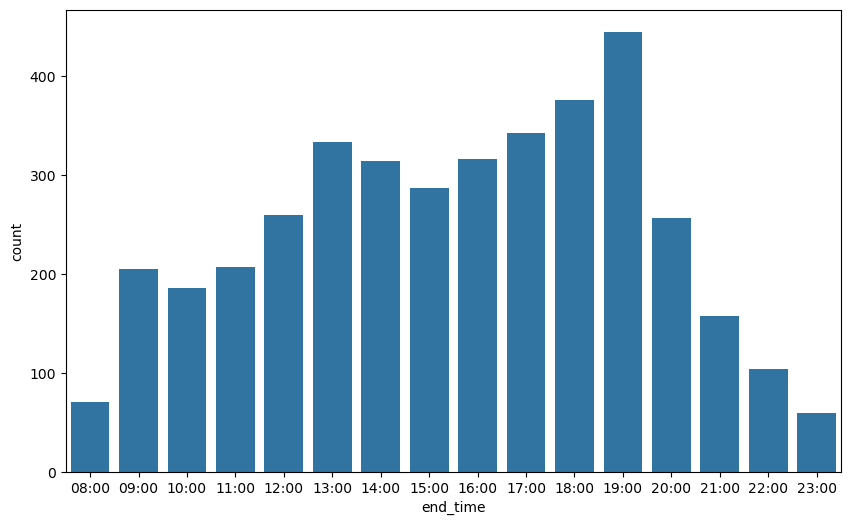

In [561]:
plt.figure(figsize=(10, 6))
sns.countplot(x='end_time', data=banpo, order=a_time)
plt.show()

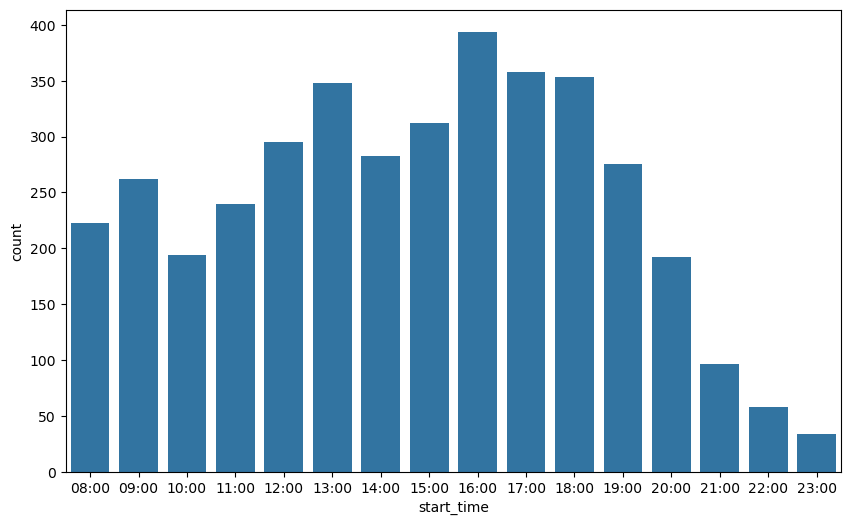

In [563]:
plt.figure(figsize=(10, 6))
sns.countplot(x='start_time', data=banpo, order=a_time)
plt.show()

### 이촌동

In [568]:
ee = od_oct_7[od_oct_7["dest_hdong_cd"].astype(str).isin(["1117063000", "1117064000"])]
ee = ee[ee['dest_purpose'].astype(str).isin(["4", "5"])]

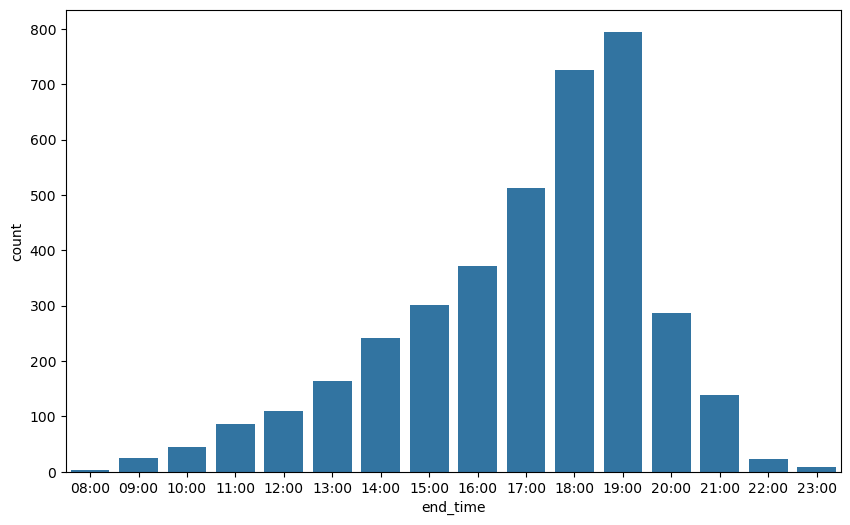

In [570]:
plt.figure(figsize=(10, 6))
sns.countplot(x='end_time', data=ee, order=a_time)
plt.show()

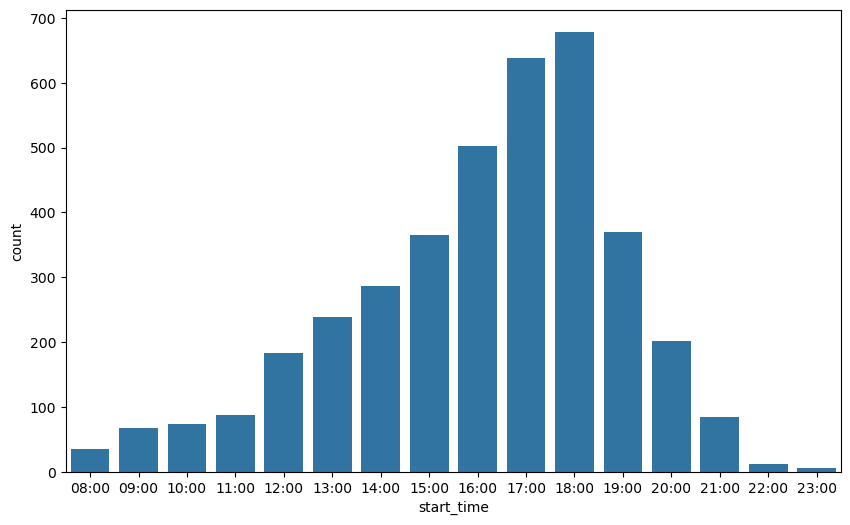

In [572]:
plt.figure(figsize=(10, 6))
sns.countplot(x='start_time', data=ee, order=a_time)
plt.show()

## 추가데이터

### 23년 10월 지하철 데이터(여의도) : 23년 10월 06 ~ 08

In [576]:
sub = pd.read_csv("CARD_SUBWAY_MONTH_202310.csv", usecols=[0, 1, 2, 3, 4, 5])

In [329]:
sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20231001,장항선,신창(순천향대),1239,1223,20231004
1,20231001,중앙선,용문,2594,2176,20231004
2,20231001,중앙선,지평,79,73,20231004
3,20231001,중앙선,회기,14745,15527,20231004
4,20231001,중앙선,중랑,3521,3583,20231004


In [333]:
sub['역명'].unique()

array(['신창(순천향대)', '용문', '지평', '회기', '중랑', '상봉(시외버스터미널)', '망우', '양원',
       '구리', '도농', '석촌', '양정', '덕소', '도심', '팔당', '운길산', '양수', '신원', '국수',
       '아신', '오빈', '양평', '원덕', '서울역', '시청', '종각', '종로3가', '종로5가', '동대문',
       '신설동', '제기동', '청량리(서울시립대입구)', '동묘앞', '을지로입구', '을지로3가', '을지로4가',
       '동대문역사문화공원(DDP)', '신당', '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수',
       '건대입구', '구의(광진구청)', '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내',
       '종합운동장', '삼성(무역센터)', '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배',
       '사당', '낙성대(강감찬)', '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지',
       '대림(구로구청)', '신도림', '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대',
       '아현', '충정로(경기대입구)', '용답', '신답', '도림천', '양천구청', '신정네거리',
       '용두(동대문구청)', '지축', '구파발', '연신내', '불광', '녹번', '홍제', '무악재', '독립문',
       '경복궁(정부서울청사)', '안국', '충무로', '동대입구', '약수', '금호', '옥수', '압구정', '신사',
       '잠원', '고속터미널', '남부터미널(예술의전당)', '양재(서초구청)', '매봉', '도곡', '대치', '학여울',
       '대청', '일원', '수서', '가락시장', '경찰병원', '오금', '당고개', '상계', '노원', '창동',
 

In [335]:
sub = sub[sub['역명'] == '여의도']

In [1015]:
subb = sub[sub['역명'] == '여의나루']

In [349]:
sub1 = sub[sub['사용일자'].astype(str).isin(['20231006', '20231007', '20231008'])]
sub1

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
3357,20231006,9호선,여의도,32931,31550,20231009
3509,20231006,5호선,여의도,32088,33945,20231009
3805,20231007,5호선,여의도,45690,52681,20231010
3956,20231007,9호선,여의도,31995,32559,20231010
4428,20231008,5호선,여의도,10543,11180,20231011
4580,20231008,9호선,여의도,12029,10847,20231011


In [1017]:
여의나루 = subb[subb['사용일자'].astype(str).isin(['20231006', '20231007', '20231008'])]
여의나루

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
3508,20231006,5호선,여의나루,17108,18570,20231009
3806,20231007,5호선,여의나루,29003,86986,20231010
4429,20231008,5호선,여의나루,16719,18551,20231011


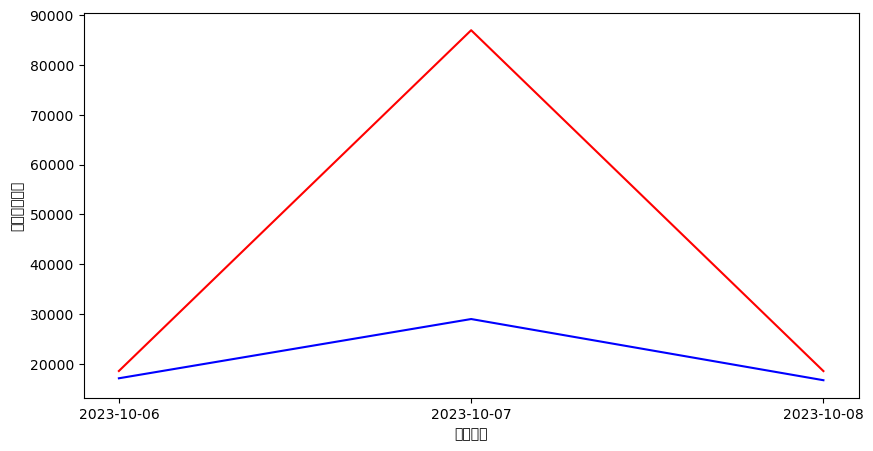

In [1019]:
import matplotlib.dates as mdates
여의나루['사용일자'] = pd.to_datetime(여의나루['사용일자'], format='%Y%m%d')

plt.figure(figsize=(10, 5))
sns.lineplot(x='사용일자', y='승차총승객수', data=여의나루, color='blue')
sns.lineplot(x='사용일자', y='하차총승객수', data=여의나루, color='red')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.show()

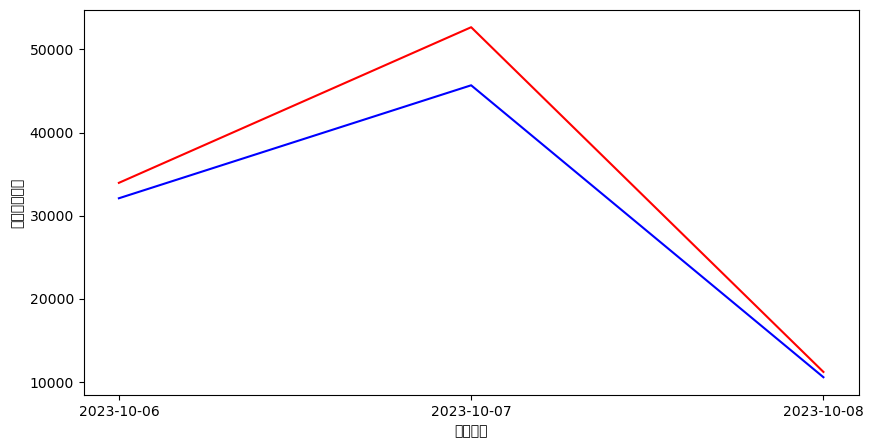

In [379]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.dates as mdates
line_5 = sub1[sub1['노선명'] == '5호선']
line_5['사용일자'] = pd.to_datetime(line_5['사용일자'], format='%Y%m%d')

plt.figure(figsize=(10, 5))
sns.lineplot(x='사용일자', y='승차총승객수', data=line_5, color='blue')
sns.lineplot(x='사용일자', y='하차총승객수', data=line_5, color='red')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.show()

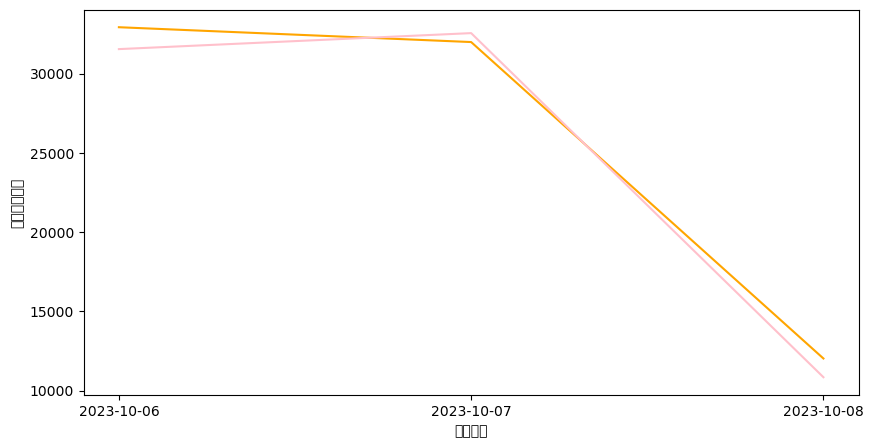

In [381]:
import matplotlib.dates as mdates
line_9 = sub1[sub1['노선명'] == '9호선']
line_9['사용일자'] = pd.to_datetime(line_9['사용일자'], format='%Y%m%d')

plt.figure(figsize=(10, 5))
sns.lineplot(x='사용일자', y='승차총승객수', data=line_9, color='orange')
sns.lineplot(x='사용일자', y='하차총승객수', data=line_9, color='pink')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.show()

### 여의나루역

In [583]:
ss = pd.read_csv("CARD_SUBWAY_MONTH_202310.csv", usecols=[0, 1, 2, 3, 4, 5])

In [589]:
subway = ss[ss['역명'] == '여의나루']

In [591]:
sub2 = subway[subway['사용일자'].astype(str).isin(['20231006', '20231007', '20231008'])]
sub2

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
3508,20231006,5호선,여의나루,17108,18570,20231009
3806,20231007,5호선,여의나루,29003,86986,20231010
4429,20231008,5호선,여의나루,16719,18551,20231011


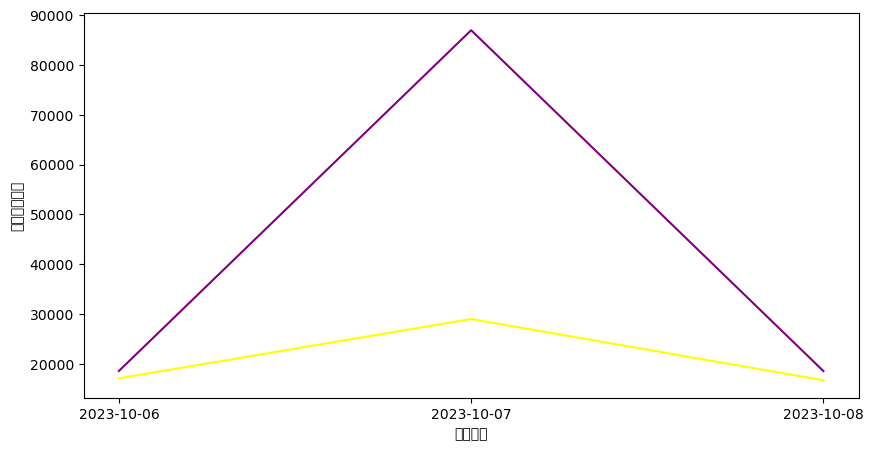

In [599]:
line_55 = sub2[sub2['노선명'] == '5호선']
line_55['사용일자'] = pd.to_datetime(line_55['사용일자'], format='%Y%m%d')

plt.figure(figsize=(10, 5))
sns.lineplot(x='사용일자', y='승차총승객수', data=line_55, color='yellow')
sns.lineplot(x='사용일자', y='하차총승객수', data=line_55, color='purple')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.show()

### 한강 주차장 : 23년 10월 06 ~ 08

In [486]:
river = pd.read_csv("한강공원 주차장 일별 이용 현황.csv", encoding = 'cp949')

river = river[river['날짜'].isin(['2023/10/06', '2023/10/07', '2023/10/08'])]
river

,지구별,주차장명,주차대수,이용시간,날짜
10102,PLT-008,여의도5주차장,305,16783,2023/10/08
10103,PLT-008,여의도1주차장,4202,399841,2023/10/08
10104,PLT-007,양화1주차장,428,28276,2023/10/08
10105,PLT-010,잠원2-6주차장,2708,246878,2023/10/08
10106,PLT-006,광나루3주차장,775,71119,2023/10/08
...,...,...,...,...,...
10181,PLT-004,"이촌3,4주차장",1104,63399,2023/10/06
10182,PLT-006,"광나루1,2주차장",830,59154,2023/10/06
10183,PLT-003,"망원2,3주차장",1078,92274,2023/10/06
10184,PLT-008,여의도2주차장,1137,185776,2023/10/06


In [500]:
river_df = river.groupby(['날짜', '주차장명'])['주차대수'].sum().reset_index()
river_df.head(30)

,날짜,주차장명,주차대수
0,2023/10/06,강서1주차장,182
1,2023/10/06,"광나루1,2주차장",830
2,2023/10/06,광나루3주차장,511
3,2023/10/06,광나루4주차장,208
4,2023/10/06,"난지1,2,3주차장",1753
5,2023/10/06,뚝섬1주차장,555
6,2023/10/06,뚝섬2주차장,931
7,2023/10/06,뚝섬3주차장,504
8,2023/10/06,뚝섬4주차장,753
9,2023/10/06,망원1주차장,358


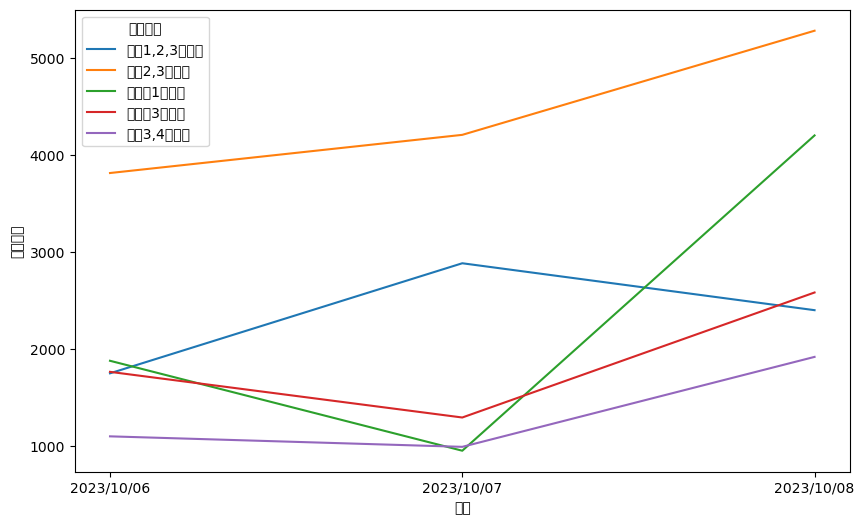

In [506]:
river_df['주차대수_변동'] = river_df.groupby('주차장명')['주차대수'].diff()

large = river_df.nlargest(5, '주차대수_변동')

hangang = river_df[river_df['주차장명'].isin(large['주차장명'])]

plt.figure(figsize=(10, 6))
sns.lineplot(data=hangang, x='날짜', y='주차대수', hue='주차장명')

plt.show()

In [508]:
large_list = large['주차장명'].unique()
print(large_list)

['여의도1주차장' '여의도3주차장' '난지1,2,3주차장' '반포2,3주차장' '이촌3,4주차장']


### 쓰레기

In [608]:
garbage1 = pd.read_csv("서울특별시_한강공원 쓰레기 발생량_20231231.csv", encoding = 'cp949')
garbage1.head()

,연도,합계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2023,3296,62,131,257,382,428,356,324,354,279,414,196,113
1,2022,3588,79,82,167,338,559,432,328,310,611,341,199,144
2,2021,2952,243,161,207,339,380,325,216,186,353,216,211,115
3,2020,3704,31,140,225,263,370,418,416,277,747,466,263,89
4,2019,3342,21,169,154,326,555,388,290,298,391,488,206,57


In [618]:
garbage2 = pd.read_csv("서울특별시_한강공원 총 11개센터 쓰레기 처리량_20231231.csv", encoding = 'cp949')

In [630]:
garbage2['기준'] = pd.to_datetime(garbage2['기준'])

garbage_f = garbage2[garbage2['기준'] == '2023-10-31']
garbage_f

,기준,광나루,잠실,잠원,반포,여의도,양화,강서,뚝섬,이촌,난지,망원,기타
21,2023-10-31,15,20,30,53,139,5,1,68,20,30,33,0


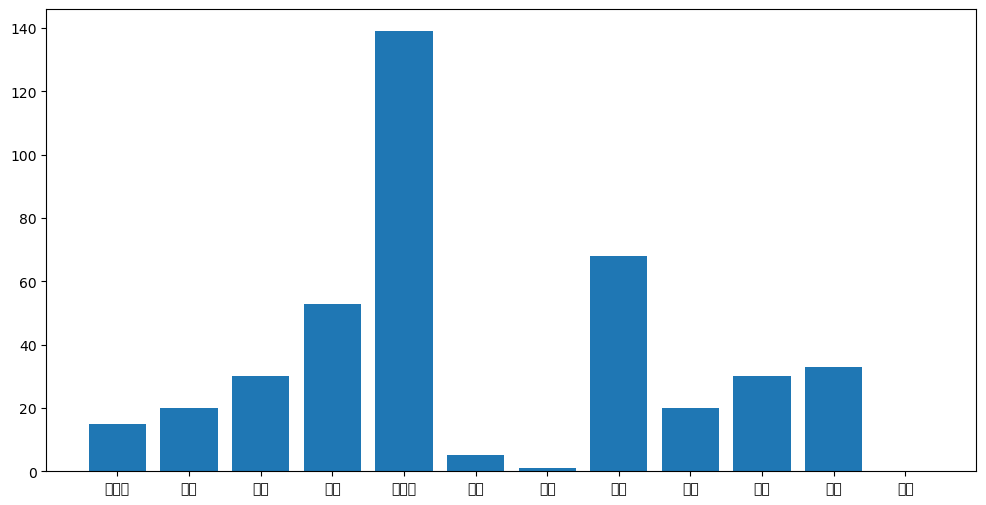

In [632]:
x = ['광나루', '잠실', '잠원', '반포', '여의도', '양화', '강서', '뚝섬', '이촌', '난지', '망원', '기타']

y = [15, 20, 30, 53, 139, 5, 1, 68, 20, 30, 33, 0]

plt.figure(figsize=(12, 6))
plt.bar(x, y)

plt.show()

## 현황 및 개선기회 참고 분석 자료

### 버스 - 여의도 지나가는 경우 위주

In [392]:
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 791.7 kB/s eta 0:00:00


In [453]:
bus_info = pd.read_excel("시내버스 2024.08월 인가현황(TOPIS).xls", engine='xlrd')
bus_info.head()

,업체명,노선\n번호,유형,기점,종점,인가\n대수,운행\n대수,예비\n대수,인가\n거리,운행\n시간,총운행\n횟수,최소,최대,첫차\n시간,막차\n시간
0,한성여객,100,간선,하계동,용산구청,29,28,1,57.09,237,106,8,13,400,2230
1,동아운수,101,간선,우이동,서소문,23,22,1,37.81,170,118,6,10,400,2300
2,한성운수,101,간선,우이동,서소문,8,8,0,37.81,170,41,5,10,400,2300
3,삼화상운,102,간선,상계주공7단지,동대문,2,2,0,30.20,126,14,8,12,400,2310
4,흥안운수,102,간선,상계주공7단지,동대문,18,17,1,30.20,126,120,8,12,400,2310


In [455]:
bus_routes = ['162', '261', '360', '461', '753', '5534', '5615', '5633', '5713', '7613', '8600', '8601', '8603', '153', '262', '600', '6030']

bus_여의도 = bus_info[bus_info['노선\n번호'].astype(str).isin(bus_routes)]
bus_여의도

,업체명,노선\n번호,유형,기점,종점,인가\n대수,운행\n대수,예비\n대수,인가\n거리,운행\n시간,총운행\n횟수,최소,최대,첫차\n시간,막차\n시간
28,대진여객,162,간선,정릉,여의도,29,27,1,37.70,155,156,6,9,400,2250
39,상진운수,261,간선,석관동(상진운수종점),여의도,33,32,1,52.70,220,128,7,11,350,2230
40,대원교통,262,간선,중랑공영차고지,여의도환승센타,5,4,1,56.50,260,18,5,15,400,2200
41,북부운수,262,간선,중랑공영차고지,여의도환승센타,29,28,1,56.50,260,102,5,15,400,2200
57,한국brt자동차,360,간선,송파차고지,여의도환승센터,51,49,2,55.70,235,192,5,7,400,2250
72,진화운수,461,간선,장지공영차고지,여의도공원,40,39,1,62.70,275,109,8,15,400,2210
88,서울교통네트웍,600,간선,온수동,광화문,27,26,1,38.10,143,168,7,9,400,2330
126,선진운수,753,간선,구산동,상도동,21,20,1,49.20,203,85,9,15,410,2220
267,보성운수,5615,지선,여의도,난곡,19,18,1,27.50,120,121,8,10,410,2300
279,범일운수,5633,지선,노온사동,순복음교회,21,20,1,55.82,193,84,11,15,420,2250


#### 버스 운행 비교 - 수치

In [458]:
print(bus_info.columns)

Index(['업체명', '노선\n번호', '유형', '기점', '종점', '인가\n대수', '운행\n대수', '예비\n대수',
       '인가\n거리', '운행\n시간', '총운행\n횟수', '최소', '최대', '첫차\n시간', '막차\n시간'],
      dtype='object')


In [462]:
bus_others = bus_info[~bus_info['노선\n번호'].astype(str).isin(bus_routes)]

bus_others

,업체명,노선\n번호,유형,기점,종점,인가\n대수,운행\n대수,예비\n대수,인가\n거리,운행\n시간,총운행\n횟수,최소,최대,첫차\n시간,막차\n시간
0,한성여객,100,간선,하계동,용산구청,29,28,1,57.09,237,106,8,13,400,2230
1,동아운수,101,간선,우이동,서소문,23,22,1,37.81,170,118,6,10,400,2300
2,한성운수,101,간선,우이동,서소문,8,8,0,37.81,170,41,5,10,400,2300
3,삼화상운,102,간선,상계주공7단지,동대문,2,2,0,30.20,126,14,8,12,400,2310
4,흥안운수,102,간선,상계주공7단지,동대문,18,17,1,30.20,126,120,8,12,400,2310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,흥안운수,서울09퇴근,간선,노원역,의정부 고산지구,0,0,0,16.00,50,1,20,20,1840,1900
482,동아운수,서울10출근,간선,의정부시가능동,도봉산,0,0,0,10.00,30,2,15,20,700,745
483,아진교통,서울10출근,간선,의정부시가능동,도봉산,0,0,0,10.00,30,2,15,20,700,745
484,동아운수,서울10퇴근,간선,도봉산역,의정부 가능,0,0,0,10.00,30,1,20,20,1840,1900


In [466]:
min_yeouido = round(bus_여의도['최소'].mean(), 2)
max_yeouido = round(bus_여의도['최대'].mean(), 2)

min_others = round(bus_others['최소'].mean(), 2)
max_others = round(bus_others['최대'].mean(), 2)

overall_min = round(bus_info['최소'].mean(), 2)
overall_max = round(bus_info['최대'].mean(), 2)

In [468]:
print(f"여의도를 지나가는 버스 최소 평균: {min_yeouido}")
print(f"여의도를 지나가는 버스 최대 평균: {max_yeouido}")

print(f"다른 버스들의 최소 평균: {min_others}")
print(f"다른 버스들의 최대 평균: {max_others}")

print(f"전체 버스들의 최소 평균: {overall_min}")
print(f"전체 버스들의 최대 평균: {overall_max}")

여의도를 지나가는 버스 최소 평균: 7.42
여의도를 지나가는 버스 최대 평균: 12.33
다른 버스들의 최소 평균: 10.26
다른 버스들의 최대 평균: 15.7
전체 버스들의 최소 평균: 10.19
전체 버스들의 최대 평균: 15.62


## 나이대별 체류 시간

In [756]:
stay_oct_7['time_hour'] = stay_oct_7['time'].str.split(':').str[0].astype(int)

stay_oct_7.head()

,hdong_cd,date,time,gender,age,purpose,stay_cnts,time_hour
0,4115056800,20231007,15:00,1,7,0,832,15
1,4611074500,20231007,22:00,1,5,0,1351,22
2,4711158000,20231007,21:00,1,2,0,981,21
3,2729053500,20231007,19:00,0,3,0,939,19
4,4113353000,20231007,22:00,1,2,0,1248,22


In [758]:
def classify_region(hdong_cd):
    if hdong_cd == 1156054000:
        return '여의'
    elif hdong_cd in [1165055000, 1165056000, 1165057000, 1165058100]:
        return '반포'
    elif hdong_cd in [1117063000, 1117064000]:
        return '이촌'
    else:
        return None  

stay_oct_7['지역'] = stay_oct_7['hdong_cd'].apply(classify_region)

filtered_data = stay_oct_7[stay_oct_7['지역'].notna()]

In [760]:
grouped = filtered_data.groupby(['gender', 'age', 'purpose', '지역']).agg(
    min_time=('time_hour', 'min'), 
    max_time=('time_hour', 'max'),  
    stay_cnts=('stay_cnts', 'sum')  
).reset_index()

grouped['머문시간'] = grouped['max_time'] - grouped['min_time'] + 1

In [762]:
result = grouped.groupby(['지역', 'age']).agg(
    머문시간합계=('머문시간', 'sum'),
    머문횟수=('머문시간', 'count') 
).reset_index()

result['머문시간평균'] = result['머문시간합계'] / result['머문횟수']

def convert_to_hours_minutes(time_in_hours):
    hours = int(time_in_hours) 
    minutes = int((time_in_hours - hours) * 60) 
    return f"{hours}시간 {minutes}분"

result['머문시간평균(시간_분)'] = result['머문시간평균'].apply(convert_to_hours_minutes)

In [764]:
print(result[['지역', 'age', '머문시간평균(시간_분)']])

    지역  age 머문시간평균(시간_분)
0   반포    0     14시간 54분
1   반포    1     14시간 45분
2   반포    2     15시간 39분
3   반포    3     14시간 27분
4   반포    4     15시간 35분
5   반포    5     15시간 35분
6   반포    6     15시간 35분
7   반포    7     15시간 18분
8   반포    8     14시간 24분
9   여의    0      15시간 5분
10  여의    1     14시간 30분
11  여의    2     15시간 39분
12  여의    3     14시간 21분
13  여의    4     15시간 35분
14  여의    5     15시간 35분
15  여의    6     15시간 35분
16  여의    7     15시간 35분
17  여의    8     15시간 18분
18  이촌    0     13시간 54분
19  이촌    1     14시간 54분
20  이촌    2      15시간 0분
21  이촌    3     15시간 30분
22  이촌    4     15시간 30분
23  이촌    5     15시간 35분
24  이촌    6     15시간 18분
25  이촌    7      15시간 5분
26  이촌    8     13시간 24분


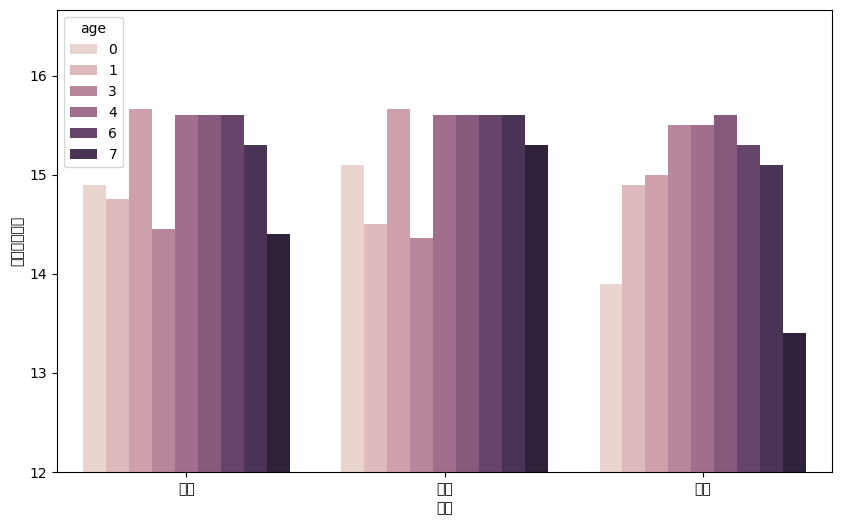

In [770]:
order = ['반포', '여의', '이촌']
result['지역'] = pd.Categorical(result['지역'], categories=order, ordered=True)

plt.figure(figsize=(10, 6))

sns.barplot(x='지역', y='머문시간평균', hue='age', data=result, order=order)

plt.ylim(12, result['머문시간평균'].max() + 1)


# 그래프 표시
plt.show()

## 연령대별 지역에 몇명이 있는가

In [780]:
grouped = filtered_data.groupby(['gender', 'age', 'purpose', '지역']).agg(
    머문사람수=('stay_cnts', 'sum')  # 각 지역, 연령별 머문 사람 수 합계 계산
).reset_index()

result = grouped.groupby(['지역', 'age']).agg(
    머문사람수합계=('머문사람수', 'sum')  # 지역과 연령별 머문 사람 수
).reset_index()

print(result)

    지역  age  머문사람수합계
0   반포    0   175245
1   반포    1   221155
2   반포    2   227040
3   반포    3   314797
4   반포    4   330697
5   반포    5   215550
6   반포    6   155258
7   반포    7    75577
8   반포    8    29303
9   여의    0   264808
10  여의    1   389377
11  여의    2   486332
12  여의    3   352956
13  여의    4   292434
14  여의    5   201896
15  여의    6   117008
16  여의    7    53069
17  여의    8    23373
18  이촌    0   119436
19  이촌    1   116690
20  이촌    2   226150
21  이촌    3   151644
22  이촌    4   130440
23  이촌    5    87027
24  이촌    6    49416
25  이촌    7    30204
26  이촌    8    16859


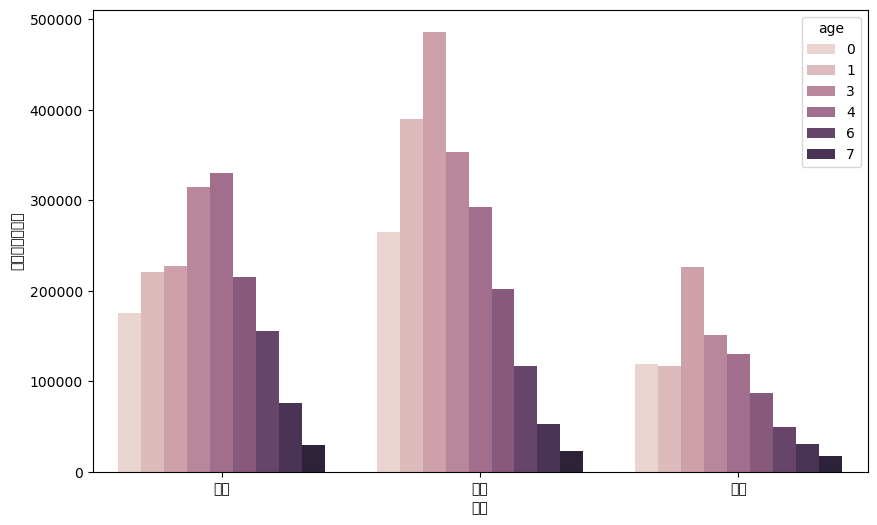

In [786]:
plt.figure(figsize=(10, 6))

order = ['반포', '여의', '이촌']
result['지역'] = pd.Categorical(result['지역'], categories=order, ordered=True)
sns.barplot(x='지역', y='머문사람수합계', hue='age', data=result)

plt.show()

## 군집분석

In [789]:
od_oct_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553369 entries, 0 to 3553368
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   origin_hdong_cd  int64  
 1   dest_hdong_cd    int64  
 2   date             int64  
 3   start_time       object 
 4   end_time         object 
 5   gender           int64  
 6   age              int64  
 7   modal            float64
 8   origin_purpose   float64
 9   dest_purpose     int64  
 10  od_dist_avg      int64  
 11  od_duration_avg  int64  
 12  od_cnts          int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 352.4+ MB


In [983]:
od_df = od_oct_7

filtered_od = od_df[od_df['dest_hdong_cd'].isin([1156054000, 1117063000, 1117064000, 
                                                 1165055000, 1165057000, 1159051000, 
                                                 1159060500, 1117057000])]
filtered_od = filtered_od[filtered_od['dest_purpose'].isin([4, 5])]

def assign_region_code(hdong_cd):
    if hdong_cd in [1117063000, 1117064000]:
        return 0
    elif hdong_cd == 1156054000:
        return 1
    elif hdong_cd in [1165055000, 1165057000]:
        return 2
    elif hdong_cd == 1159051000:
        return 3
    elif hdong_cd == 1159060500:
        return 4
    elif hdong_cd == 1117057000:
        return 5

filtered_od['region_code'] = filtered_od['dest_hdong_cd'].apply(assign_region_code)

selected_columns = filtered_od[['od_duration_avg', 'od_dist_avg']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_columns)

a = filtered_od['region_code'].values.reshape(-1, 1)  # region_code
b = filtered_od['age'].values.reshape(-1, 1)  # age
c = filtered_od['modal'].values.reshape(-1, 1)  # modal

processed_data = np.hstack((a, b, c, scaled_data))

주성분 1: 누적 설명된 분산 비율 = 0.3059
주성분 2: 누적 설명된 분산 비율 = 0.5783
주성분 3: 누적 설명된 분산 비율 = 0.7861
주성분 4: 누적 설명된 분산 비율 = 0.9702
주성분 5: 누적 설명된 분산 비율 = 1.0000


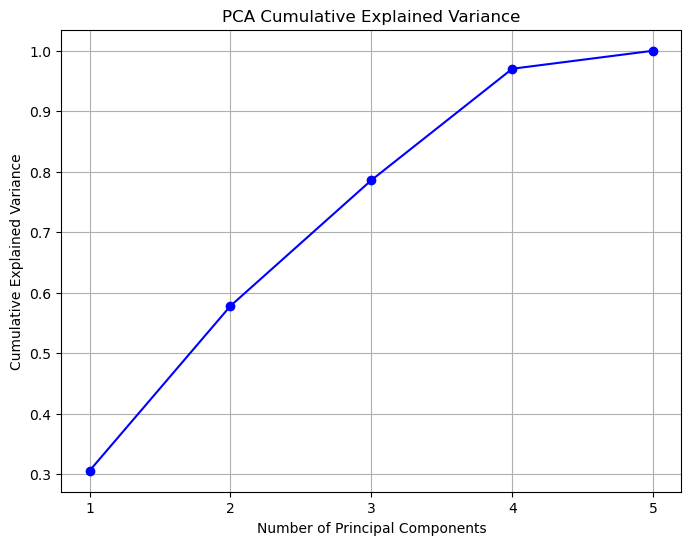

In [984]:
pca = PCA()
pca_data = pca.fit_transform(processed_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"주성분 {i+1}: 누적 설명된 분산 비율 = {ratio:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()

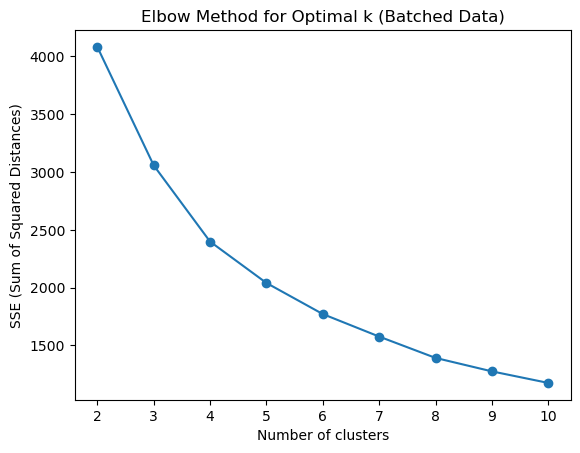

Enter the optimal number of clusters:  7


평균 실루엣 점수: 0.3257185604431555


In [991]:
batch_size = 1000

sse = []
silhouette_scores = []

for start in range(0, len(processed_data), batch_size):
    batch_data = processed_data[start:start + batch_size]
    
    pca = PCA(n_components=3)
    pca_batch_data = pca.fit_transform(batch_data)
    
    batch_sse = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_batch_data)
        batch_sse.append(kmeans.inertia_)
    sse.append(batch_sse)

avg_sse = np.mean(sse, axis=0)
plt.plot(range(2, 11), avg_sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k (Batched Data)')
plt.show()

optimal_k = int(input("Enter the optimal number of clusters: "))

for start in range(0, len(processed_data), batch_size):
    batch_data = processed_data[start:start + batch_size]
    
    pca = PCA(n_components=3)
    pca_batch_data = pca.fit_transform(batch_data)
    
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    clusters = kmeans.fit_predict(pca_batch_data)
    
    sil_score = silhouette_score(pca_batch_data, clusters)
    silhouette_scores.append(sil_score)

avg_silhouette_score = np.mean(silhouette_scores)
print(f"평균 실루엣 점수: {avg_silhouette_score}")

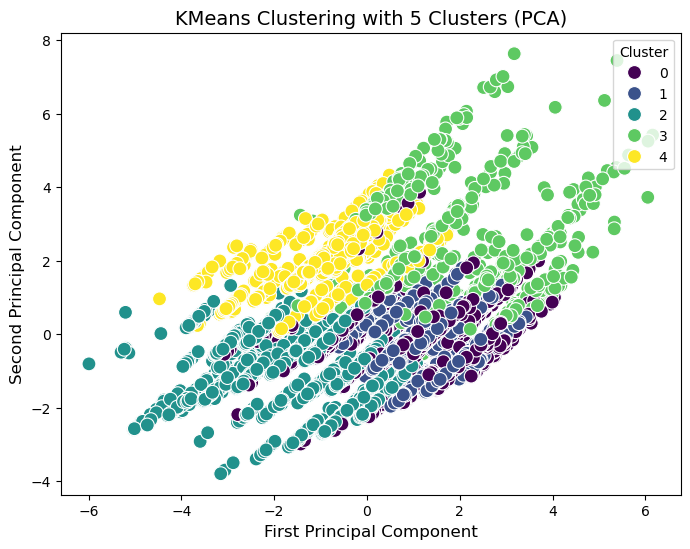

In [993]:
#실루엣 점수가 그나마 높은 5 선택
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(pca_data)

plt.figure(figsize=(8, 6))

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', legend='full', s=100)

plt.title(f'KMeans Clustering with {optimal_k} Clusters (PCA)', fontsize=14)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

plt.legend(title='Cluster', loc='upper right')

plt.show()

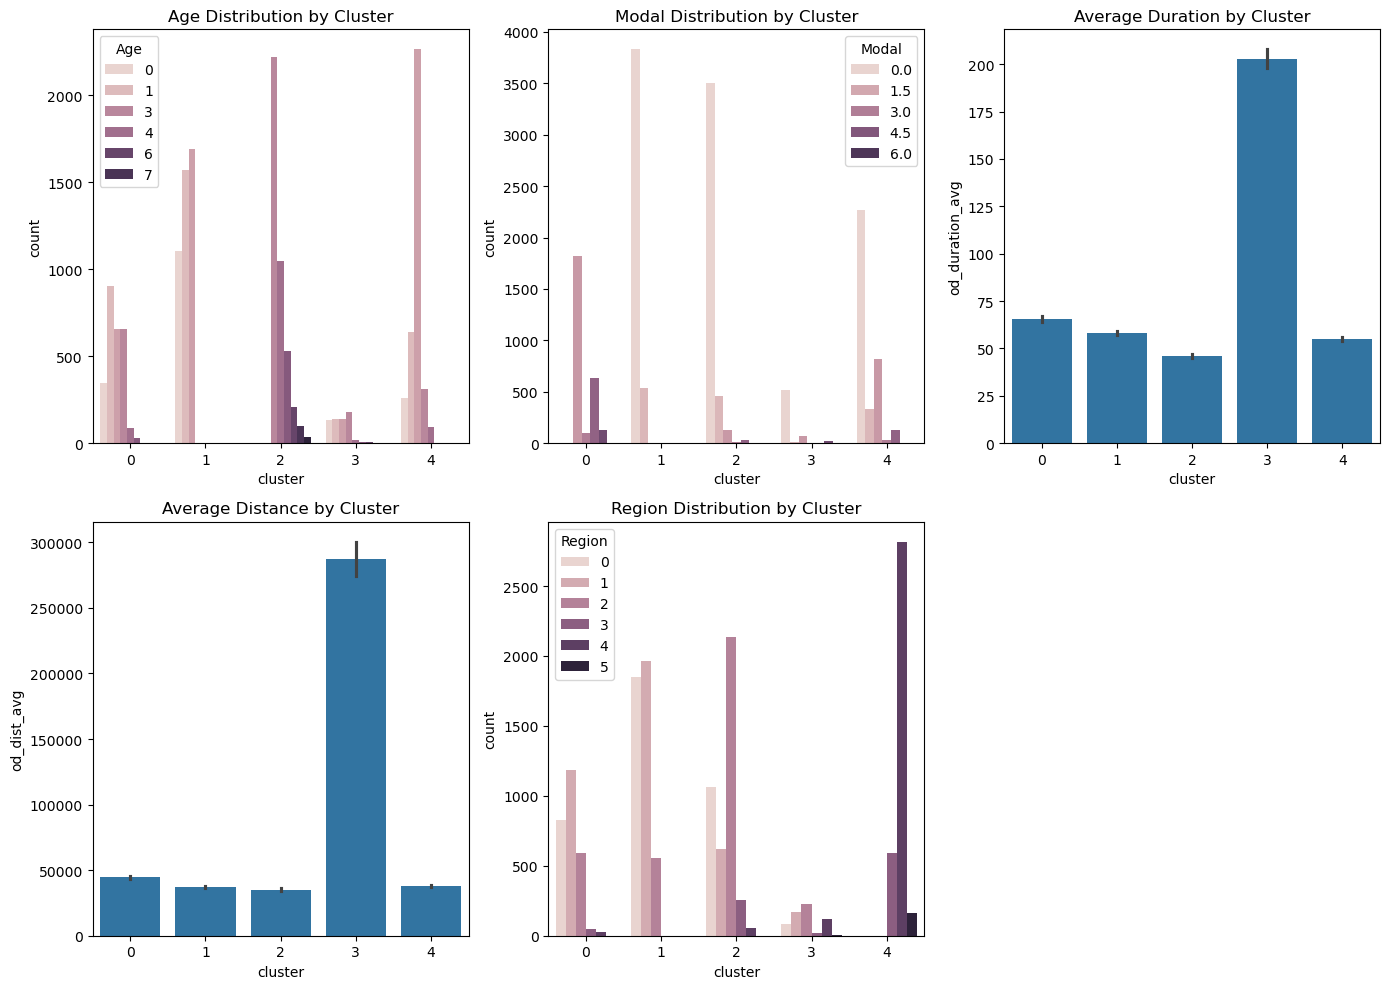

In [1005]:
filtered_od['cluster'] = clusters  

plt.figure(figsize=(14, 10))

#나이
plt.subplot(2, 3, 1)
sns.countplot(data=filtered_od, x='cluster', hue='age')
plt.title('Age Distribution by Cluster')
plt.legend(title='Age')

#수단
plt.subplot(2, 3, 2)
sns.countplot(data=filtered_od, x='cluster', hue='modal')
plt.title('Modal Distribution by Cluster')
plt.legend(title='Modal')

#이동시간
plt.subplot(2, 3, 3)
sns.barplot(data=filtered_od, x='cluster', y='od_duration_avg')
plt.title('Average Duration by Cluster')

#이동거리
plt.subplot(2, 3, 4)
sns.barplot(data=filtered_od, x='cluster', y='od_dist_avg')
plt.title('Average Distance by Cluster')

# 지역
plt.subplot(2, 3, 5)
sns.countplot(data=filtered_od, x='cluster', hue='region_code')
plt.title('Region Distribution by Cluster')
plt.legend(title='Region')

plt.tight_layout()
plt.show()

In [1009]:
age_dist = filtered_od.groupby(['cluster', 'age']).size().reset_index(name='count')
modal_dist = filtered_od.groupby(['cluster', 'modal']).size().reset_index(name='count')
duration_avg = filtered_od.groupby('cluster')['od_duration_avg'].mean().reset_index(name='average_duration')
distance_avg = filtered_od.groupby('cluster')['od_dist_avg'].mean().reset_index(name='average_distance')

print("Age Distribution by Cluster")
print(age_dist)

print("\nModal Distribution by Cluster")
print(modal_dist)

print("\nAverage Duration by Cluster")
print(duration_avg)

print("\nAverage Distance by Cluster")
print(distance_avg)

Age Distribution by Cluster
    cluster  age  count
0         0    0    348
1         0    1    901
2         0    2    659
3         0    3    655
4         0    4     89
5         0    5     28
6         0    6      1
7         0    7      1
8         1    0   1106
9         1    1   1570
10        1    2   1692
11        2    3   2218
12        2    4   1046
13        2    5    530
14        2    6    210
15        2    7     99
16        2    8     33
17        3    0    131
18        3    1    139
19        3    2    140
20        3    3    180
21        3    4     21
22        3    5      7
23        3    6      8
24        3    7      3
25        4    0    259
26        4    1    638
27        4    2   2265
28        4    3    314
29        4    4     92
30        4    5      3

Modal Distribution by Cluster
    cluster  modal  count
0         0    2.0   1820
1         0    3.0     98
2         0    4.0    635
3         0    5.0    129
4         1    0.0   3833
5         1    1.

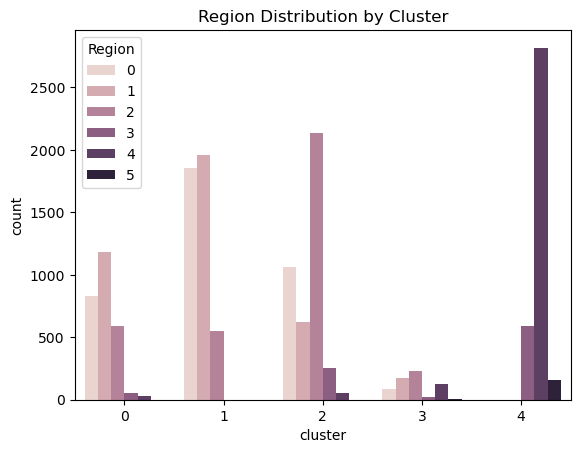

In [999]:
sns.countplot(data=filtered_od, x='cluster', hue='region_code')
plt.title('Region Distribution by Cluster')
plt.legend(title='Region')

plt.show()

In [1007]:
cluster_region_counts = filtered_od.groupby(['cluster', 'region_code']).size().reset_index(name='count')
top_2_per_cluster = cluster_region_counts.groupby('cluster').apply(lambda x: x.nlargest(2, 'count')).reset_index(drop=True)

top_2_per_cluster

,cluster,region_code,count
0,0,1,1183
1,0,0,830
2,1,1,1962
3,1,0,1853
4,2,2,2137
5,2,0,1065
6,3,2,230
7,3,1,170
8,4,4,2818
9,4,3,593


## 연령대 & 성별